In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [103]:
df = pd.read_csv('dataset/dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
numerical_values = ['Age', 'Fare']
df_numerical = df[numerical_values]
df_numerical

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
1304,NaN,8.0500
1305,39.0,108.9000
1306,38.5,7.2500
1307,NaN,8.0500


In [105]:
categorical_values = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked', 'SibSp', 'Parch']
df_categorical = df[categorical_values]
df_categorical

,Survived,Pclass,Sex,Cabin,Embarked,SibSp,Parch
0,0,3,male,NaN,S,1,0
1,1,1,female,C85,C,1,0
2,1,3,female,NaN,S,0,0
3,1,1,female,C123,S,1,0
4,0,3,male,NaN,S,0,0
...,...,...,...,...,...,...,...
1304,0,3,male,NaN,S,0,0
1305,1,1,female,C105,C,0,0
1306,0,3,male,NaN,S,0,0
1307,0,3,male,NaN,S,0,0


<AxesSubplot:>

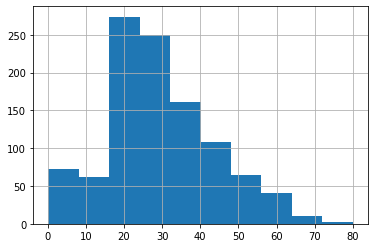

In [106]:
df['Age'].hist()

<AxesSubplot:>

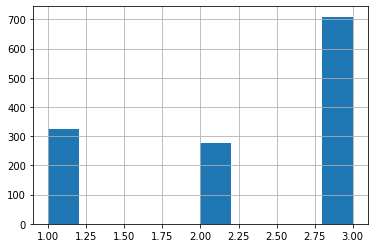

In [107]:
df['Pclass'].hist()

<AxesSubplot:>

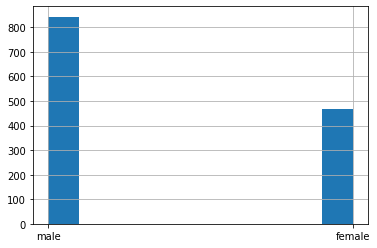

In [108]:
df['Sex'].hist()

<AxesSubplot:ylabel='Sex'>

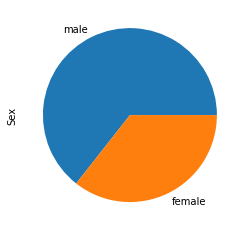

In [109]:
df['Sex'].value_counts().plot.pie()

<AxesSubplot:>

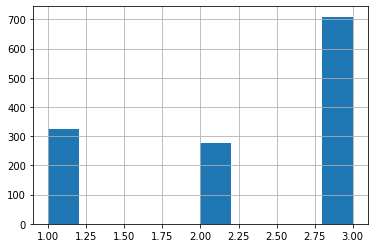

In [110]:
df['Pclass'].hist()

<AxesSubplot:ylabel='Pclass'>

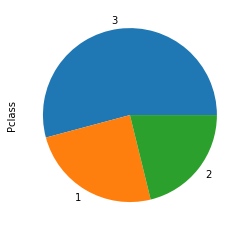

In [111]:
df['Pclass'].value_counts().plot.pie()

<AxesSubplot:>

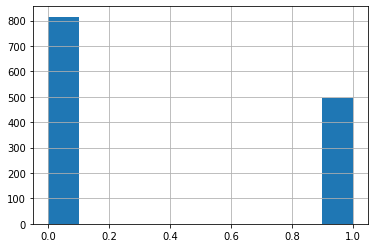

In [112]:
df['Survived'].hist()

In [113]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [114]:
df.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.000,1309.000,1046.000,1309.000,1309.000,1308.000
mean,655.00,0.377,2.295,29.881,0.499,0.385,33.295
std,378.02,0.485,0.838,14.413,1.042,0.866,51.759
min,1.00,0.000,1.000,0.170,0.000,0.000,0.000
25%,328.00,0.000,2.000,21.000,0.000,0.000,7.896
50%,655.00,0.000,3.000,28.000,0.000,0.000,14.454
75%,982.00,1.000,3.000,39.000,1.000,0.000,31.275
max,1309.00,1.000,3.000,80.000,8.000,9.000,512.329


In [115]:
df.drop(['Name', 'Ticket', 'Embarked', 'Fare', 'PassengerId'], axis=1, inplace=True)

In [116]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

df['Age'].describe()

count    1309.000000
mean        0.372180
std         0.161383
min         0.000000
25%         0.273456
50%         0.372180
75%         0.436302
max         1.000000
Name: Age, dtype: float64

1014
0


<AxesSubplot:>

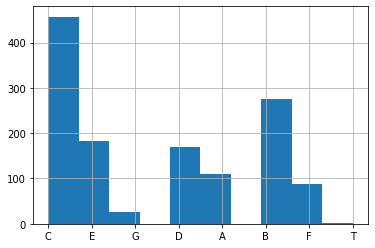

In [117]:
df['Cabin'] = df['Cabin'].apply(lambda x: x if pd.isna(x) else str(x)[0])

print(df['Cabin'].isna().sum())

df['Cabin'] = df['Cabin'].ffill()
most_common = df['Cabin'].value_counts()
df['Cabin'] = df['Cabin'].fillna(most_common.index[0])

print(df['Cabin'].isna().sum())

df['Cabin'].hist()

<AxesSubplot:ylabel='Cabin'>

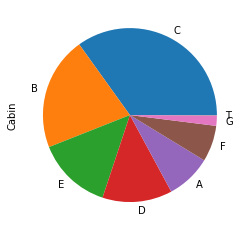

In [118]:
df['Cabin'].value_counts().plot.pie()

In [119]:
encoder = OneHotEncoder()
df[encoder.get_feature_names_out()] = encoder.fit_transform(df['Cabin'].to_numpy().reshape(-1, 1)).toarray()
df.drop(['Cabin'], axis=1, inplace=True)

In [120]:
df[encoder.get_feature_names_out()] = encoder.fit_transform(df['Sex'].to_numpy().reshape(-1, 1)).toarray()
df.drop(['Sex'], axis=1, inplace=True)

In [121]:
df[encoder.get_feature_names_out()] = encoder.fit_transform(df['Pclass'].to_numpy().reshape(-1, 1)).toarray()
df.drop(['Pclass'], axis=1, inplace=True)

In [122]:
df

,Survived,Age,SibSp,Parch,x0_A,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x0_T,x0_female,x0_male,x0_1,x0_2,x0_3
0,0,0.273456,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0.473882,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0.323563,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0.436302,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0.436302,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0.372180,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,1,0.486409,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1306,0,0.480145,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,0,0.372180,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [123]:
x, y = df.drop(['Survived'], axis=1).values, df['Survived'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 82.19%


<AxesSubplot:>

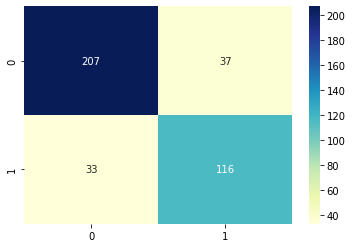

In [125]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
score = rfc.score(x_test, y_test)
matrix = confusion_matrix(y_test, rfc.predict(x_test))
print(f'Accuracy: {score*100:.2f}%')
sns.heatmap(matrix, annot=True, cmap='YlGnBu', fmt='d')

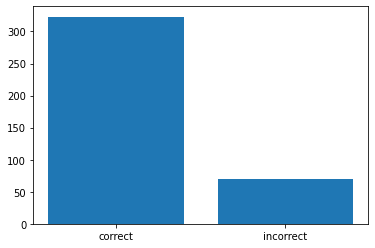

In [126]:
plt.bar(['correct', 'incorrect'], [matrix[0,0] + matrix[1,1], matrix[0,1] + matrix[1,0]])
plt.show()